# Distribución Normal Estandard
###### https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_norm.html
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html#scipy.stats.truncnorm


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, truncnorm
import matplotlib.pyplot as plt

# Termometros científicos

La Precision Scientific Instrument Company fabrica termómetros que se supone deben dar lecturas de 0°C al punto de congelación del agua. 
+ Las pruebas de una muestra grande de estos instrumentos revelaron que en el punto de congelación del agua, algunos termómetros daban lecturas por debajo de 0° (denotadas con números negativos), y otros daban lecturas por encima de 0° (denotadas con números positivos). 
+ Suponga que la lectura media es 0°C y que la desviación estándar de las lecturas es 1.00°C. 
+ También suponga que las lecturas se distribuyen de manera normal. 
+ a) Si se elige al azar un termómetro, calcule la probabilidad de que, al punto de congelación del agua, la lectura sea menor que 1.58

**Solución**
La distribución de probabilidad de las lecturas es una distribución normal estándar, ya que las lecturas se distribuyen de forma normal, con m = 0 y s = 1. 
+ Necesitamos encontrar el área que está debajo de z = 1.58, y como se trata de una distribución normal estándard entonces z=x.
+ El área por debajo de z = x = 1.58 es igual a la probabilidad de seleccionar al azar un termómetro con una lectura menor que 1.58°. 
    + En base a norm.cdf(x) de Scipy encontramos que esta área es 0.9429.
    + Y graficando vemos el área buscada y el resultado.

In [2]:
# Creación de los valores de x o percentiles
# Como la distribución es normal distribuye los valores desde negativos hasta positivos con media cero
x_min = norm.ppf(0.00001) # devuelve el valor de probabilidad correspondiente al percentil especificado como argumento
x_max = norm.ppf(0.99999) # devuelve el valor de probabilidad correspondiente al percentil especificado como argumento
x_rango = np.linspace(x_min, x_max, 10000)  # rango de valores del eje x

# Limites inferior y superior para calcular la probabilidad acumulada
a = x_min   # Límite inferior
b = 1.58    # Límite superior
p_cdf = norm.cdf(b)
print(f"Rango de valores de la distribución normal: {x_min, x_max }")
print(f"Rango de valores de probabilidad acumulada: {a, b})")
print(f"probabilidad acumulada: {norm.cdf(b)}")


Rango de valores de la distribución normal: (-4.264890793922825, 4.264890793923841)
Rango de valores de probabilidad acumulada: (-4.264890793922825, 1.58))
probabilidad acumulada: 0.9429465667622459


In [3]:
# Probabilidad acumulada - Visualización del área del calculo y resultados
def dist_acu(a=None, b=None):
    """
     Función: Esta función grafica:
     1. La curva de distribución normal de probabilidad entre x_min y x_max
     2. El área de probabilidad acumulada bajo la curva entre a y b
     3. Coloca paremetros y resultados en el gráfico
     Paremetros:
     x_rango: es el rango de x correspondiente a la curva de distribución
     a: Límite inferior del rango de probabilidad buscado
     b: Límite superior del rango de probabilidad buscado
     Consideraciones sobre los parámetros a y b:
     + si se especifica a y b, la probabilidad acumulada entre a y b
     + si no se especifica ni a ni b, la función calcula la brobabilidad total entre minimo y maximo, es decir 100%
     + si no se especifica a, la función calcula desde el mínimo de la distribución hasta el limite b o el máximo.
     + si no se especifica b la función calcula desde a hasta el máximo
    """

    # Rango de x de la funcion de distribución normal
    # Como la distribución es normal distribuye los valores desde negativos hasta positivos con media cero
    x_min = norm.ppf(0.00001) # devuelve el valor de probabilidad correspondiente al percentil especificado como argumento
    x_max = norm.ppf(0.99999) # devuelve el valor de probabilidad correspondiente al percentil especificado como argumento
    x_rango = np.linspace(x_min, x_max, 10000)  # rango de valores del eje x

    # Rango de x entre a y b
    a = x_min if a is None else a 
    b = x_max if b is None else b
    
    ### Líneas de debug
    # print(f"a:{a}, b:{b}")
    # cdfa = norm.cdf(a)
    # cdfb = norm.cdf(b)
    # cdfab = cdfb-cdfa
    # print(f"norm.cdf(b):{cdfa}")
    # print(f"norm.cdf(b):{cdfb}")
    # print(f"cdf a-b : {cdfab}")
    
    # Calculo del rango de x entre a y b que estoy buscando
    ab_rango = np.linspace(a, b, 1000) # rango de valores de probabilidad acumulada buscado

    # Genero la plantilla del grafico
    fig, ax = plt.subplots(1, 1, figsize = (7,4))

    # Dibujo la distribución normal
    ax.plot(x_rango, norm.pdf(x_rango), 'k-', lw=2, alpha=0.6, label='norm pdf')

    # Sombreado del área bajo la curva de interés
    ax.fill_between(ab_rango, 0, norm.pdf(ab_rango), color='blue', alpha=0.2, label='Área bajo la curva')

    # Dibujar las líneas punteadas en pdf(a), pdf(b)
    ax.plot([a, a], [0, norm.pdf(a)], linestyle="dashed")
    ax.plot([b, b], [0, norm.pdf(b)], linestyle="dashed")

    # Añadir texto de valor de variable "a" y su probabilidad "p(a)"
    if a > x_min:
        ax.text(a, -0.02, f'x={a:.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de x=a
        ax.text(a, norm.pdf(a), f'p={norm.pdf(a):.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de p(ba
    
    # Añadir texto de valor de variable "b" y su probabilidad "p(b)"
    if b < x_max:
        ax.text(b, -0.02, f'x={b:.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de x=b
        ax.text(b, norm.pdf(b), f'p={norm.pdf(b):.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de p(b)

    # Añadir texto probabilidad acumulada en el centro del gráfico
    x_centro = (x_rango.max() + x_rango.min()) / 2 # Punto medio del eje X
    y_centro = 0.14  # Valor arbitrario en el eje Y (cerca del centro de la distribución)
    ax.text(x_centro, y_centro, f"{(norm.cdf(b)-norm.cdf(a))*100:.1f}%", ha='center', va='center', fontsize=10, color='red')

    # Personalización del gráfico
    # ax.set_title('Distribución Normal Estandard')
    ax.set_xlabel('x')
    # ax.set_ylabel('Densidad de probabilidad')
    # ax.legend()
    # plt.grid(True)

    ax.set_yticks([])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('gray')

    plt.show()


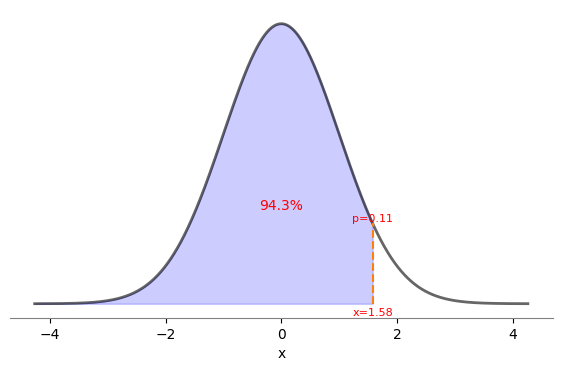

In [13]:
# Probabilidad de encontrar un termometro con una lectura menor a 1.58 grados
dist_acu(b=1.58)

**Interpretación**
+ La probabilidad de seleccionar al azar un termómetro con una lectura menor que 1.58° (en el punto de congelación del agua) 
+ es igual al área de 0.9429,
    + aparece como la región sombreada en la figura. 
+ Otra forma de interpretar este resultado es concluir que:
    + el 94.39% de los termómetros tendrán lecturas por debajo de 1.58°.

b) Utilice los termómetros del caso y calcule la probabilidad de seleccionar al azar un termómetro con una lectura (en el punto de congelación del agua):
+ por arriba de 1.23°.

Probabilidad acumulada por encima de 1.23°: 0.10934855242569191


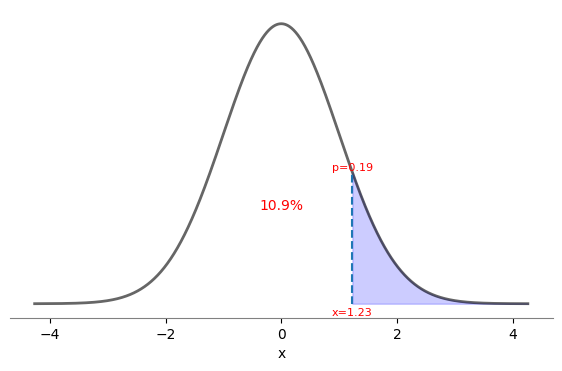

In [14]:
# Probabilidad de termometros que indiquen temperatura mayor a 1.23 grados
print(f"Probabilidad acumulada por encima de 1.23°: {norm.sf(1.23)}")
dist_acu(a=1.23)

c) Qué porcentaje de termometros podran tener una lectura de temperatura menor que 1.23° (en 0° reales)

Probabilidad acumulada por debajo de 1.23°:0.8906514475743081


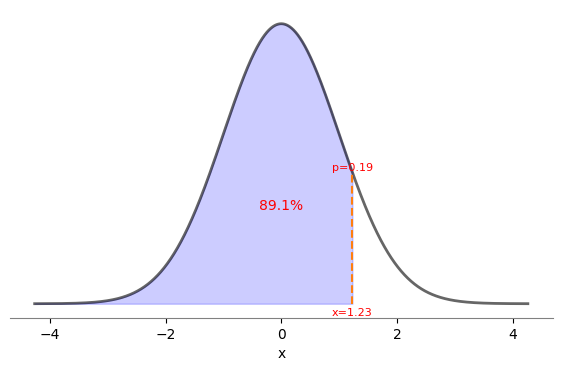

In [17]:
# Probabilidad de encontar termometros con lecturas por debajo de 1.23 grados
print(f"Probabilidad acumulada por debajo de 1.23°:{norm.cdf(1.23)}")
dist_acu(b=1.23)

d) Haga una selección aleatoria de la misma muestra de termómetros y calcule la probabilidad de que el termómetro elegido tenga lecturas (en el punto de congelación del agua)
+ entre -2.00° y 1.50°.

Probabilidad de encontrar termometros que marquen entre 2 y 1.5 grados es: 0.0227501319481792 - 0.9331927987311419 = -0.9104426667829627


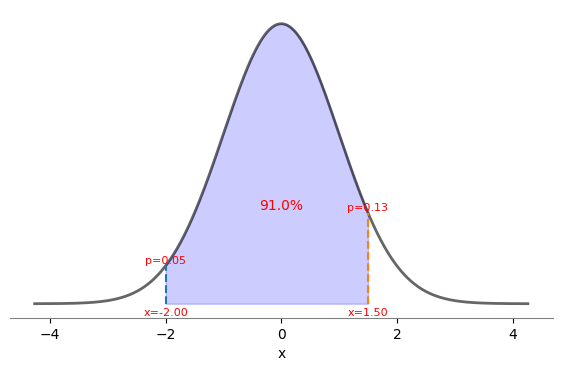

In [23]:
# Probabilidad de encontrar termometros que marquen entre 2 y 1.5 grados
print(f"Probabilidad de encontrar termometros que marquen entre 2 y 1.5 grados es: {norm.cdf(-2)} - {norm.cdf(1.5)} = {norm.cdf(-2)-norm.cdf(1.5)}")
dist_acu(-2, 1.5)

**Interpretación**
+ Considerando la correspondencia entre probabilidad y área, concluimos que existe una probabilidad de 0.9104
  + de seleccionar al azar uno de los termómetros con una lectura entre -2.00° y 1.50°, en el punto de congelación del agua. 
+ Otra forma de interpretar este resultado es afirmar que si se seleccionan muchos termómetros para probarlos en el punto de congelación del agua, 
  +entonces 0.9104 (o el 91.04%) de ellos tendrán lecturas entre -2.00° y 1.50°.

e) Termómetros científicos Use los mismos termómetros anteriores, 
+ con lecturas de temperatura al punto de congelación del agua distribuidas normalmente, con una media de 0°C y una desviación estándar de 1°C. 
    + Calcule la temperatura correspondiente a P95, el  percentil 95.
    + Grafique la probabilidad acumulada y haga su interpretación. 

La z o x (en este caso), correspondiente al percentil 95 es: 1.6448536269514722.
La temperatura correspondiente al percencil 95 es:0.10313564037537139
La probabilidad acumulada: Cantidad de termometros que estén dentro del percentil 95 es: 0.95 


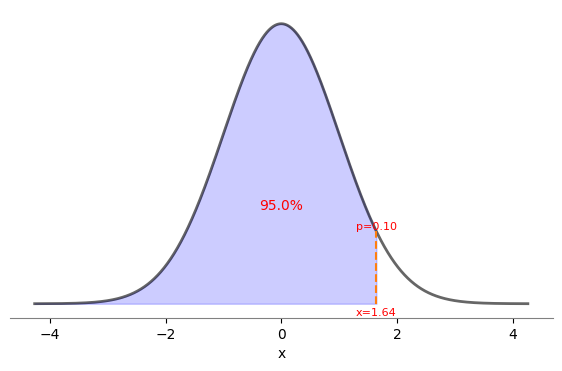

La probabilidad acumulada: Cantidad de termometros que estén fuera del percentil 95 es: 0.050000000000000044 


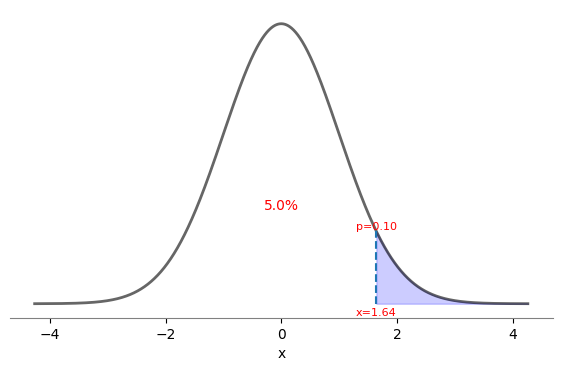

In [30]:
# Temperatura correspondiente al percentil 95
x_de_percent95= norm.ppf(0.95)
probabilidad95= norm.pdf(x_de_percent95)
probacumulad95= norm.cdf(x_de_percent95)
probacumulad05= norm.sf(x_de_percent95)
print(f"La z o x (en este caso), correspondiente al percentil 95 es: {x_de_percent95}.")
print(f"La temperatura correspondiente al percencil 95 es:{probabilidad95}")
print(f"La probabilidad acumulada: Cantidad de termometros que estén dentro del percentil 95 es: {probacumulad95} ")
dist_acu(b=x_de_percent95)
print(f"La probabilidad acumulada: Cantidad de termometros que estén fuera del percentil 95 es: {probacumulad05} ")
dist_acu(a=x_de_percent95)

**Interpretación**
+ Cuando la temperatura real sea cero grados, entonces.
    + El 95% de los termómetros indicará que la temperatura es menor a 1.64°
    + El 05% de los termómetros indicará que la temperatura es superior a 1.64°
+ La temperatura correspondiente al percentil 95 es 1.64°
+ La probabilidad acumulada de que los termometros indiquen 1.64 grados o menos es del 95%.
+ La probabilidad acumulada de que los termometros indiquen temperaturas mayores a 95% es de 5%.
+ La probabilidad de que un termometro marque exactamente 1.64 grados es 10%.
+ La mayoría de los termómetros (95%) indicará temperaturas menores a 1.64°. Es decir que:
    + La probabilidad de que un termómetro indique la temperatura de 1.54° es baja (10%)
    + La probabilidad de que un termómetor indique temperaturas mayores es aún más baja (5%)


f) Utilice los mismos termómetros y calcule las temperaturas que separan el 2.5% inferior y el 2.5% superior.

Las temperaturas que separan el 2.5% inferior del 2.5% superior son -1.96 y 1.96 respectivamente.
Entre ambas temperaturas hay un rango de : 3.92 grados.


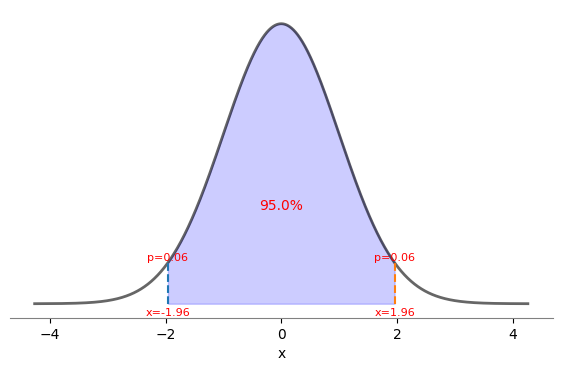

In [37]:
# Temperaturas que separan el 2.5% inferior del 2.5 superior
tempercebt0025 = norm.ppf(0.025)
tempercent0075 = norm.ppf(1-0.025)
tempentre25y75 = tempercent0075 - tempercebt0025
print(f"Las temperaturas que separan el 2.5% inferior del 2.5% superior son {tempercebt0025:.2f} y {tempercent0075:.2f} respectivamente.")
print(f"Entre ambas temperaturas hay un rango de : {tempentre25y75:.2f} grados.")
print(f"El ")
dist_acu(tempercebt0025, tempercent0075)

_________________________________________________________________________________________________________________________________________________________________________